# The Prediction of Client Subscription to Bank Deposits


Danni Li ; Vanessa Pang; Zunquan Wang; Diane Xu; Zibo Shang

## Introduction

A term deposit is a type of investment where the client is guaranteed a specific return rate at the end of the fixed-term, after depositing funds into a financial institution. [[1](https://www.westpac.com.au/personal-banking/bank-accounts/term-deposit/savings-vs-term-deposit/)] One of the many benefits includes if interest rates shift lower over time, you will still earn the fixed interest rate on the maturity date. [[1](https://www.westpac.com.au/personal-banking/bank-accounts/term-deposit/savings-vs-term-deposit/)] Banks have often been interested in knowing what type of clients subscribe to term deposits. Therefore, this research project will address the question, “Given a new client, will they subscribe to a term deposit?”    

The dataset used to explore the above question is taken from the UCI Machine Learning Repository and is titled bank-additional-full.csv. This file includes 41188 observations and 20 input variables, ranging from May 2008 to November 2010. The target variable is y, a boolean: Yes if the client subscribes to a term deposit, and No otherwise. 



In [2]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

## Data Pre-Processing
The following cells downloads the data file from UCI website directly so this could run in any environment. The expected outcome `y` is then mutated into a factor.

In [3]:
#downloading zip file that contains dataset to local env
download.file("http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip","bank.zip")
unzip("bank.zip", "bank-full.csv") #unzip
bank <- read.csv("bank-full.csv", sep=";", header = TRUE) %>% 
     mutate(y = as_factor(y)) #read csv and mutate outcome as factor for future traning
     
bank

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<fct>
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [4]:
# Splitting the dataset into traning and testing set. Here we used a 8/2 split as normal practice.
# 7.5/2.5 split provides a good balance of training and testing set sizes. 
bank_split <- initial_split(bank, prop = 0.75, strata = y)  
bank_train <- training(bank_split)   
bank_test <- testing(bank_split)

bank_train
bank_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<fct>
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45205,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<fct>
9,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
12,29,admin.,single,secondary,no,390,yes,no,unknown,5,may,137,1,-1,0,unknown,no
17,45,admin.,single,unknown,no,13,yes,no,unknown,5,may,98,1,-1,0,unknown,no
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45211,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


## Data Summarization

In [5]:
summarization <- data.frame("Bought Deposit" = nrow(filter(bank_train, y == "yes")), 
                            "Did not Bought Deposit" = nrow(filter(bank_train, y == "no")),
                            "Total" = nrow(bank_train))
summarization

Bought.Deposit,Did.not.Bought.Deposit,Total
<int>,<int>,<int>
3967,29942,33909


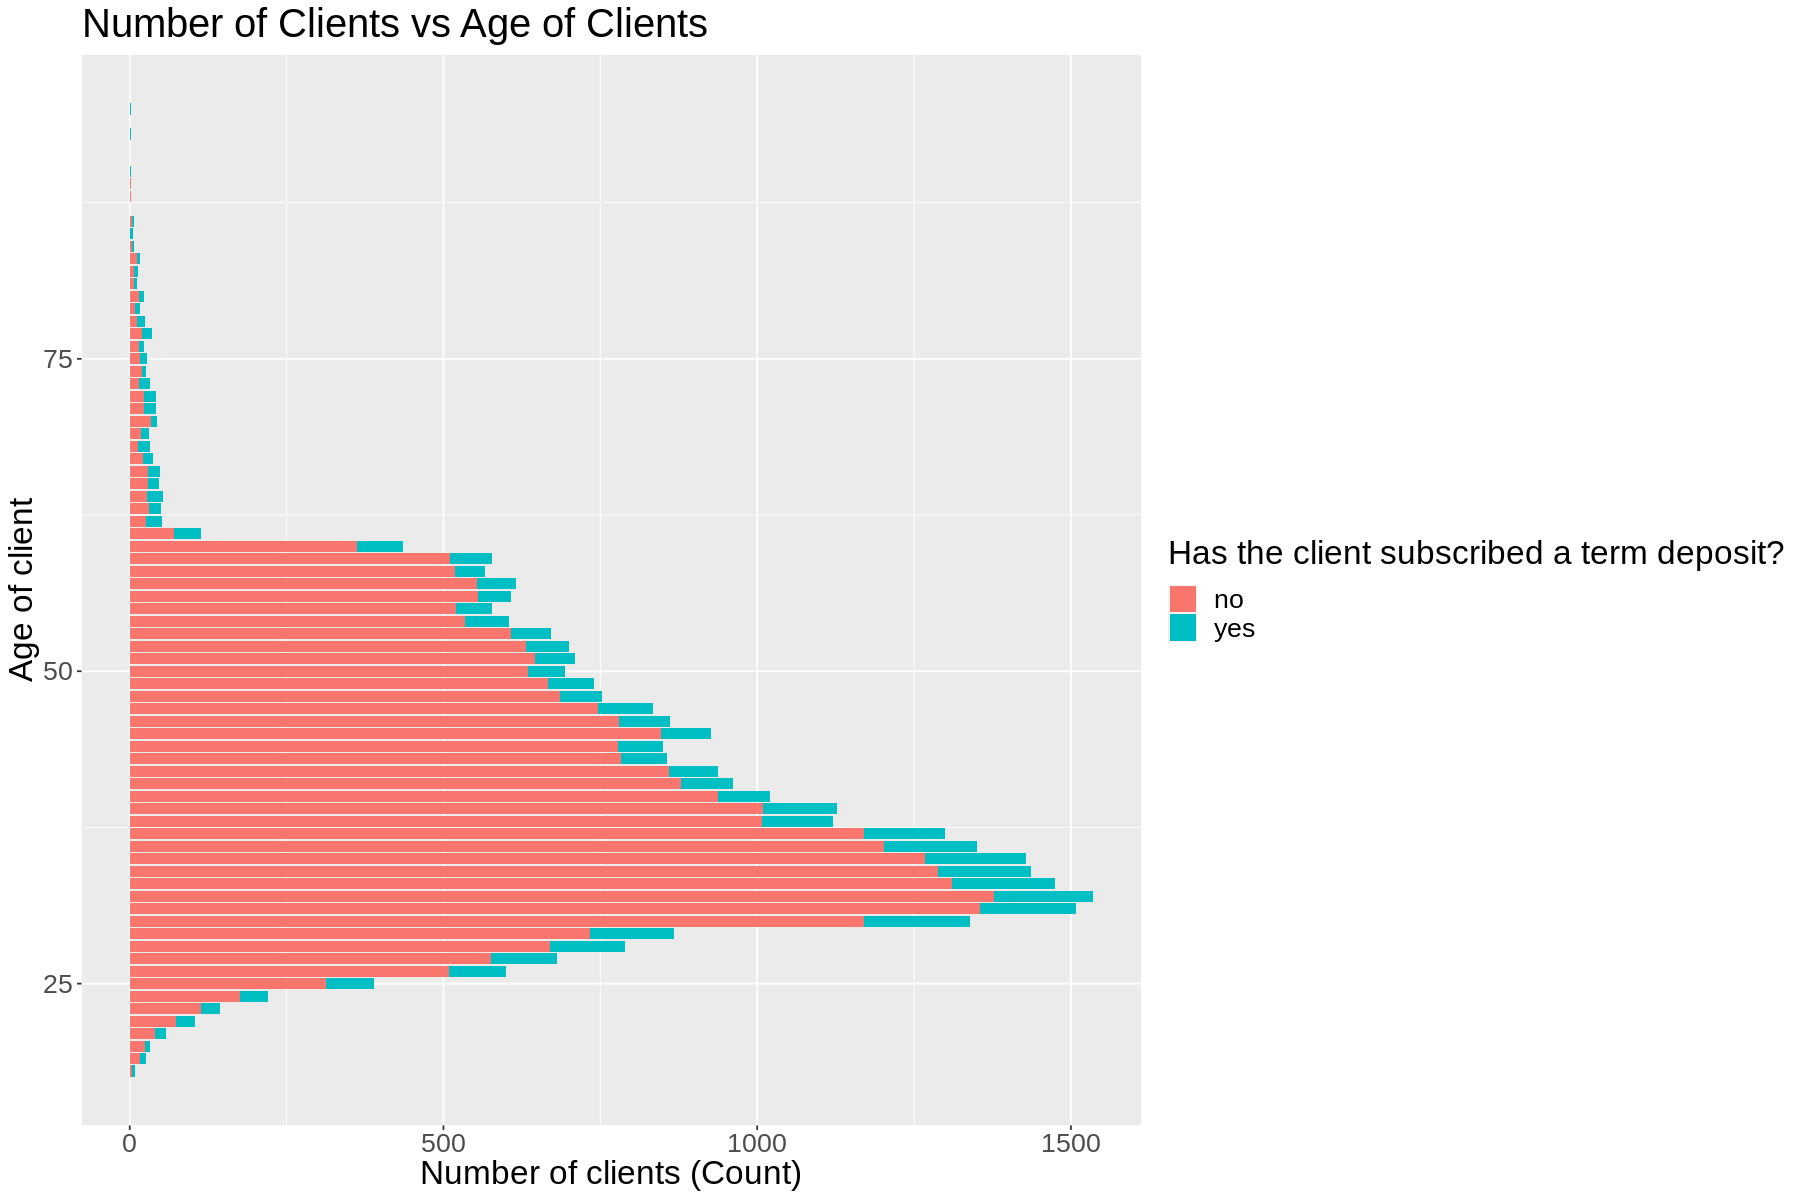

In [11]:
#bar chart of age and term deposit(predict variable)
options(repr.plot.width = 15, repr.plot.height = 10) 
age_subscribe_plot <- 
     ggplot(bank_train, aes(y = age)) +
     geom_bar(aes(fill = y), position = position_stack(reverse = TRUE)) +
     labs(x = "Number of Clients (Count)", y = "Age of Client", fill = "Has the client subscribed a term deposit?") +
     ggtitle("Number of Clients vs Age of Clients") +
     theme(legend.position = "right", text = element_text(size = 20))

age_subscribe_plot


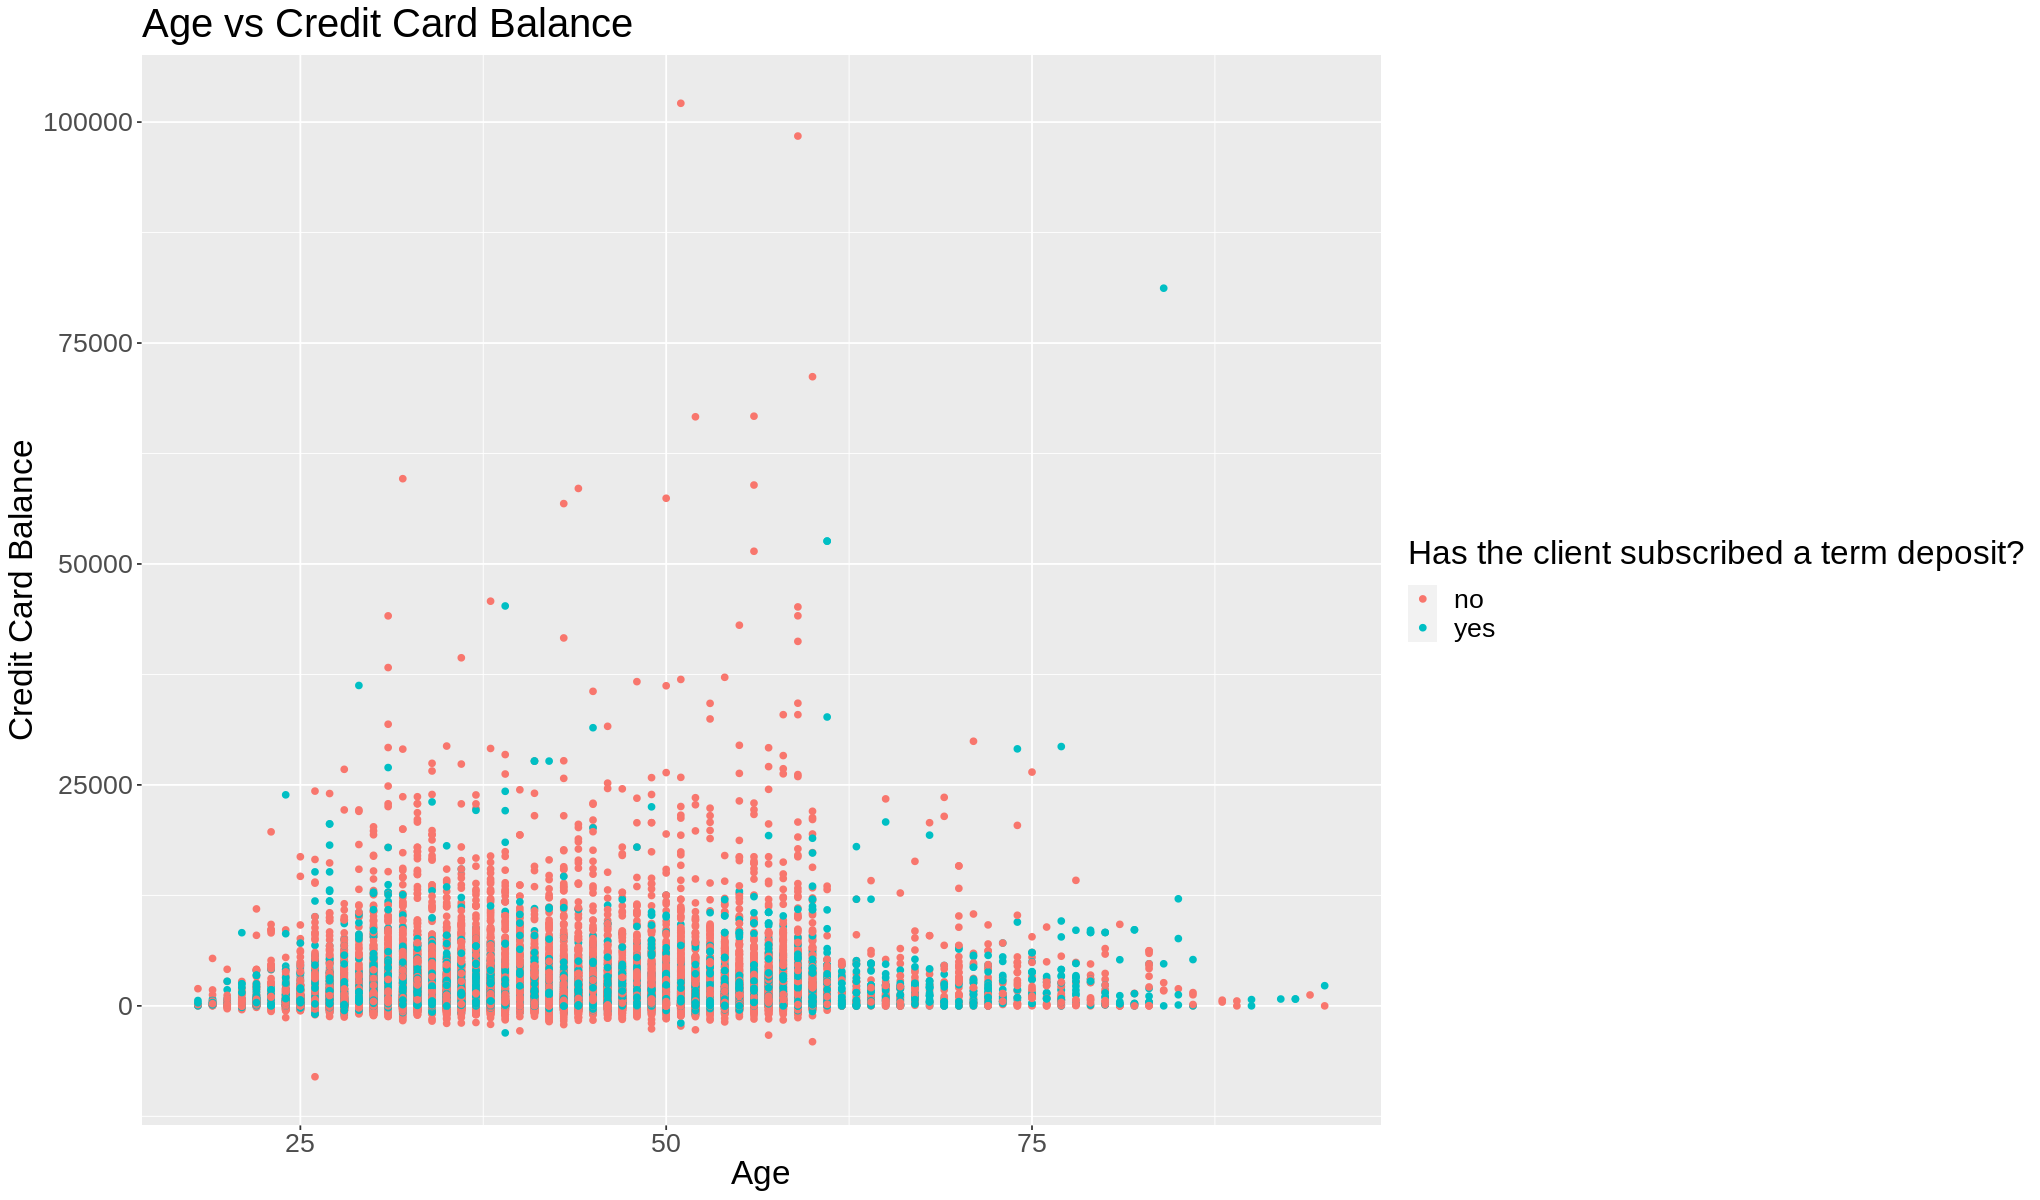

In [10]:
#scattor plot of age and balance
options(repr.plot.width = 17, repr.plot.height = 10) 
age_balance_plot <- bank_train %>%
    ggplot(aes(x = age, y =  balance)) + 
        geom_point(aes(colour = y)) +
        labs(x = "Age", y = "Credit Card Balance", colour = "Has the client subscribed a term deposit?") +
        ggtitle("Age vs Credit Card Balance") +
        theme(text = element_text(size=20))

age_balance_plot

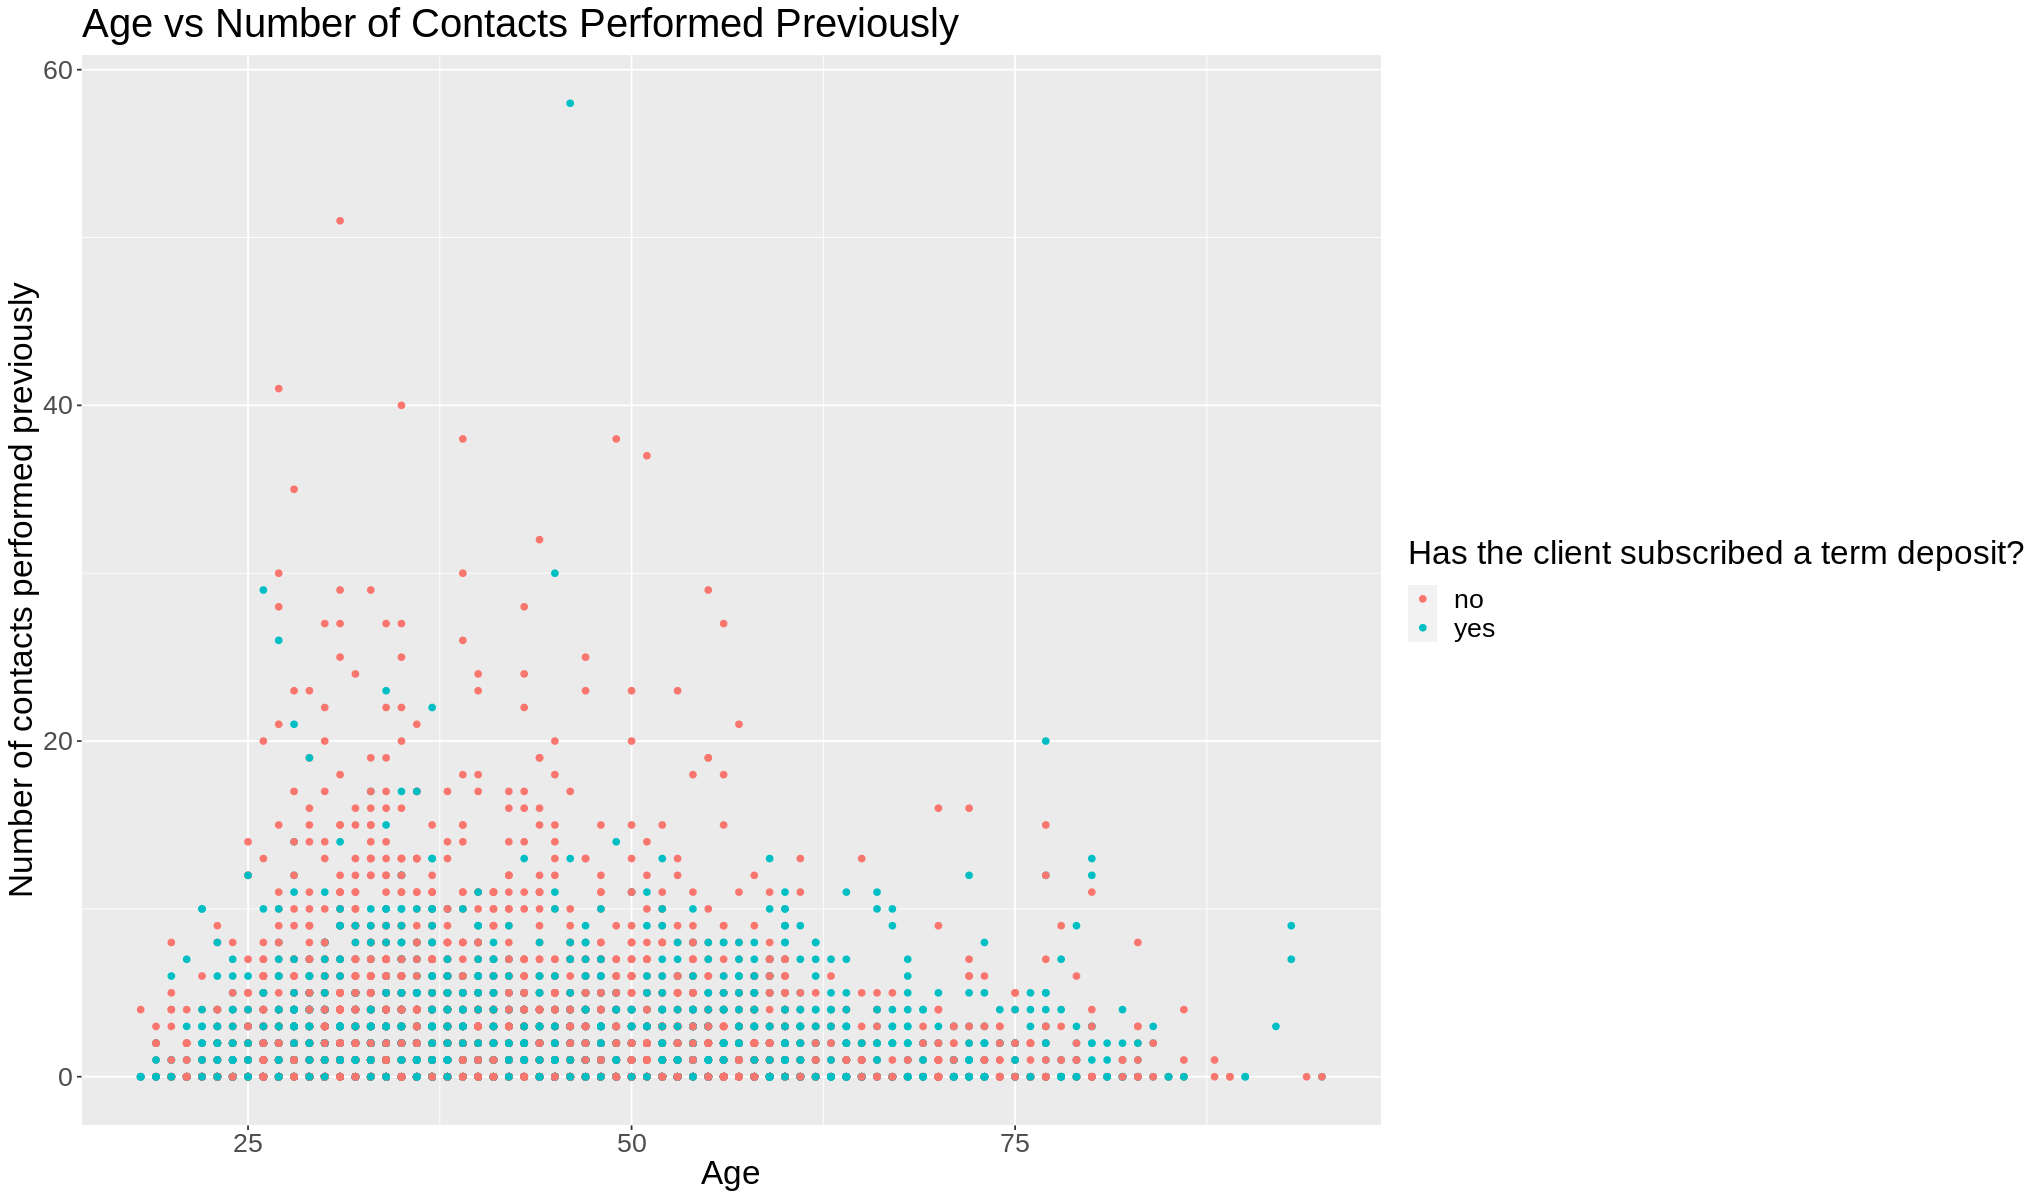

In [13]:
#scattor plot of age and previous
options(repr.plot.width = 17, repr.plot.height = 10) 
age_previous_plot <- bank_train %>%
    ggplot(aes(x = age, y =  previous)) + 
        geom_point(aes(colour = y)) +
        labs(x = "Age", y = "Number of Contacts Performed Previously", colour = "Has the client subscribed a term deposit?") + 
        ggtitle("Age vs Number of Contacts Performed Previously") +
        theme(text = element_text(size=20))

age_previous_plot

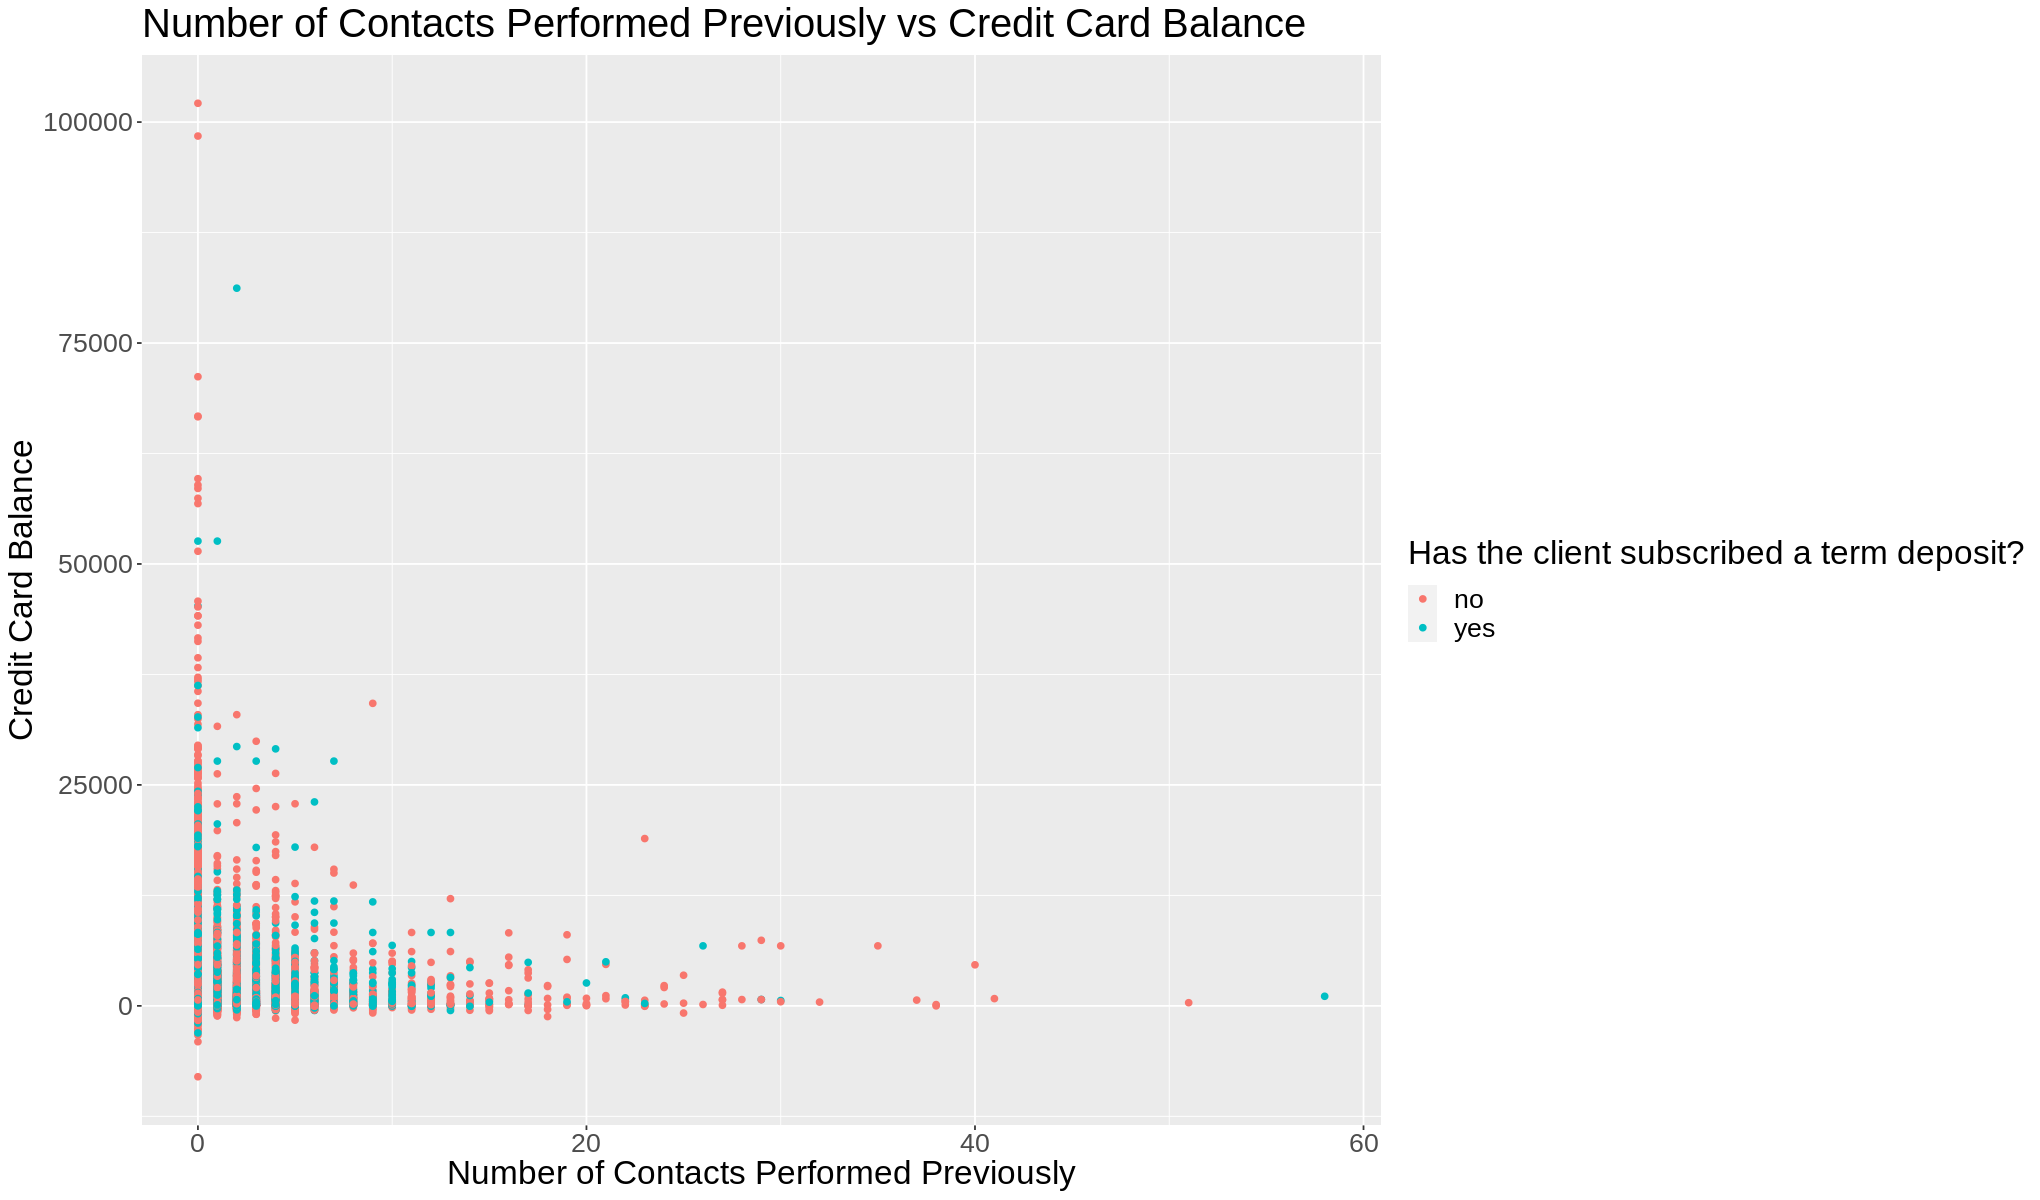

In [16]:
#scattor plot of balance and previous
options(repr.plot.width = 17, repr.plot.height = 10) 
age_previous_plot <- bank_train %>%
    ggplot(aes(x = previous, y =  balance)) + 
        geom_point(aes(colour = y)) +
        labs(x = "Number of Contacts Performed Previously", y = "Credit Card Balance", colour = "Has the client subscribed a term deposit?") + 
        ggtitle("Number of Contacts Performed Previously vs Credit Card Balance") +
        theme(text = element_text(size=20))

age_previous_plot

## Methods:

K- nearest neighbours: To classify an example xitilda:
1. Find the ‘k’ training examples xi that are “nearest” to  xitilda.
2. Classify using the most common label of “nearest” training examples.

Using L2 norm("euclidean norm") : ||r2||_2 = sqrt(r1^2 + r2^2)
k = split data into training and validation data, then use validation error to choose k. 


bank.csv
The predicted label( variable y) is if or not the client will subscribe (yes/no) a term deposit. 
The features (variable x): 6 choosen from 16 variables

bank client data: <br>
age (numeric); job : type of job (categorical);  loan: has personal loan? (categorical: 'no','yes','unknown'); balance (numeric)
social and economic context attributes: <br>
employment variation rate - quarterly indicator (numeric); consumer price index - monthly indicator (numeric) ; 

## Result Visualization

<p>By using a scatterplot, with the most weighted attribute variable on x-axis and the second most weighted attribute on y-axis, we are easiler to plot the location of each point <br>
Each point in the plane is colored by their classification (yes or no), which would be assigned to it using the K-Nearest Neighbors algorithm.<br>
The points with the same prediction result usually have shorter distance, since they are "neighbours". 

## Expected Outcomes and Significance

We expect to use the numerical methods to find what is the main decision factor that makes the clients deposit their money into the bank based on the comparison of the choosing factors.<br>

Upon finding out what the main deciding factor is, we can review and enhance our marketing strategies to better target specific areas. 

In future, addressing the predictions of other marketing variables such as in the case of telemarketing where duration of calls is considered (which affects the probability of successful contacts highly) and amounts deposited into the bank. This will optimize on the strategic operations of the bank resulting in gains by the bank.


## References

1. https://www.westpac.com.au/personal-banking/bank-accounts/term-deposit/savings-vs-term-deposit/